In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 The **pd.read_csv()** function is used to read a CSV file and load it into a pandas DataFrame for data analysis.

In [ ]:
mcd_df = pd.read_csv("/content/menu (1).csv")

The function **mcd_df.head()** is used to display the first 5 rows of the DataFrame **mcd_df**.

In [ ]:
mcd_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


**mcd_df.shape** tells you the number of rows and columns **mcd_df**.

In [ ]:
mcd_df.shape

(260, 24)

In [ ]:
mcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

**mcd_df['Category'].value_counts()** shows how many items are in each food category in the dataset. 🍔🥗🥤

In [ ]:
mcd_df['Category'].value_counts()

,count
Category,
Coffee & Tea,95
Breakfast,42
Smoothies & Shakes,28
Chicken & Fish,27
Beverages,27
Beef & Pork,15
Snacks & Sides,13
Desserts,7
Salads,6


  **mcd_df.isnull().sum()** shows the number of missing (null) values in each column of the dataset.


In [ ]:
mcd_df.isnull().sum()

,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


**mcd_df['Category'].nunique()** returns the number of unique categories in the "Category" column.

In [ ]:
mcd_df['Category'].nunique()

9

In [ ]:
mcd_df['Item'].value_counts().head()

,count
Item,
McFlurry with Reese's Peanut Butter Cups (Snack),1
Egg McMuffin,1
Egg White Delight,1
Sausage McMuffin,1
Vanilla Shake (Large),1


**mcd_df['Item'].nunique()** returns the number of unique food items in the "Item" column.

In [ ]:
mcd_df['Item'].nunique()

260

A **boxplot** is used to visualize the distribution of data, and findout outliers,

<Axes: ylabel='Calories'>

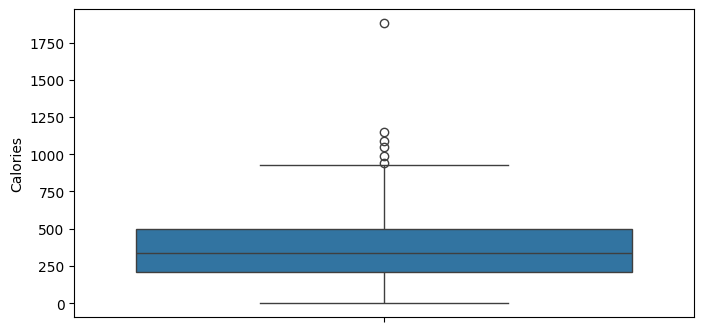

In [ ]:
plt.figure(figsize=(8,4))

sns.boxplot(data=mcd_df['Calories'])

In [ ]:
iqr = mcd_df['Calories'].quantile(0.75) - mcd_df['Calories'].quantile(0.25)
ul = mcd_df['Calories'].quantile(0.75) + (1.5 * iqr)
ll = mcd_df['Calories'].quantile(0.25) - (1.5 * iqr)
print(iqr)
print(ul)
print(ll)

290.0
935.0
-225.0


In [ ]:
mcd_df['Calories'] = np.where(mcd_df['Calories'] > ul , ul,
                                  np.where(mcd_df['Calories'] < ll , ll , mcd_df['Calories']))

<Axes: ylabel='Calories'>

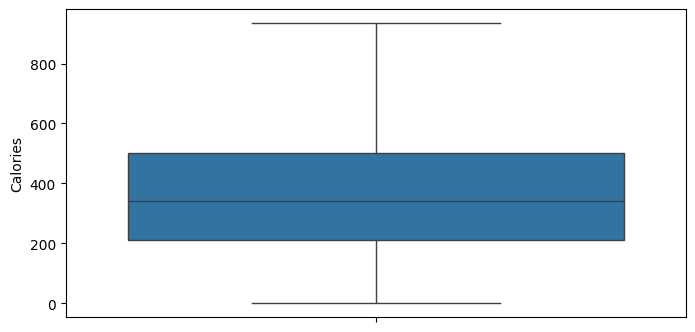

In [ ]:
plt.figure(figsize=(8,4))

sns.boxplot(data=mcd_df['Calories'])

In [ ]:
IQR = mcd_df['Calories from Fat'].quantile(0.75) - mcd_df['Calories from Fat'].quantile(0.25)
print(IQR)
UL = mcd_df['Calories from Fat'].quantile(0.75) + (1.5 * IQR)
LL = mcd_df['Calories from Fat'].quantile(0.25) - (1.5 * IQR)
print(UL)
print(LL)

180.0
470.0
-250.0


In [ ]:
mcd_df['Calories from Fat'] = np.where(mcd_df['Calories from Fat'] > UL , UL,
                              np.where(mcd_df['Calories from Fat'] < LL , LL, mcd_df['Calories from Fat']))

<Axes: ylabel='Calories from Fat'>

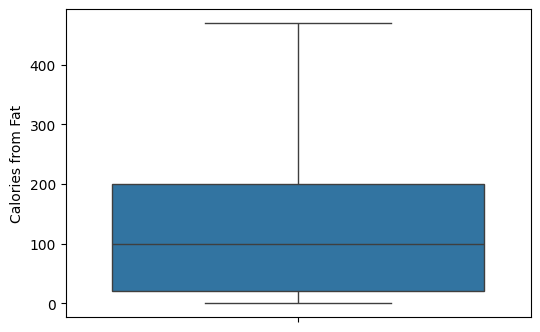

In [ ]:
plt.figure(figsize=(6,4))

sns.boxplot(data=mcd_df['Calories from Fat'])

In [ ]:
IQR = mcd_df['Total Fat'].quantile(0.75) - mcd_df['Total Fat'].quantile(0.25)
print(IQR)
UL = mcd_df['Total Fat'].quantile(0.75) + (1.5 * IQR)
LL = mcd_df['Total Fat'].quantile(0.25) - (1.5 * IQR)
print(UL)
print(LL)

19.875
52.0625
-27.4375


In [ ]:
mcd_df['Total Fat'] = np.where(mcd_df['Total Fat'] > UL , UL,
                              np.where(mcd_df['Total Fat'] < LL , LL, mcd_df['Total Fat']))

<Axes: ylabel='Total Fat'>

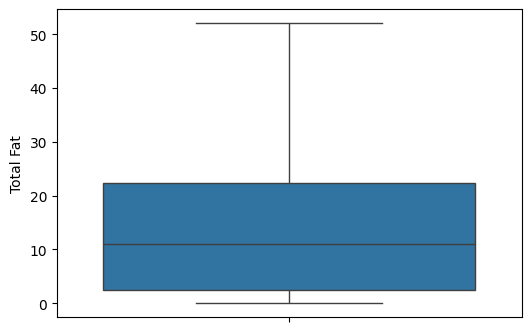

In [ ]:
plt.figure(figsize=(6,4))

sns.boxplot(data=mcd_df['Total Fat'])

In [ ]:
IQR = mcd_df['Total Fat (% Daily Value)'].quantile(0.75) - mcd_df['Total Fat (% Daily Value)'].quantile(0.25)
print(IQR)
UL = mcd_df['Total Fat (% Daily Value)'].quantile(0.75) + (1.5 * IQR)
LL = mcd_df['Total Fat (% Daily Value)'].quantile(0.25) - (1.5 * IQR)
print(UL)
print(LL)

31.25
81.875
-43.125


In [ ]:
mcd_df['Total Fat (% Daily Value)'] = np.where(mcd_df['Total Fat (% Daily Value)'] > UL , UL,
                              np.where(mcd_df['Total Fat (% Daily Value)'] < LL , LL, mcd_df['Total Fat (% Daily Value)']))

<Axes: ylabel='Total Fat (% Daily Value)'>

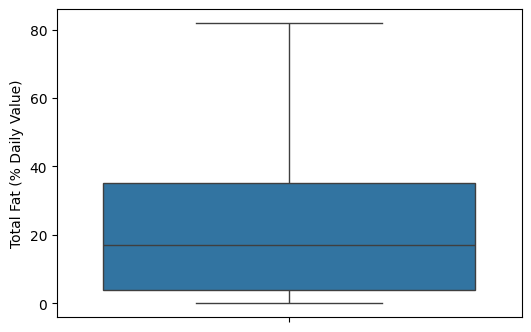

In [ ]:
plt.figure(figsize=(6,4))

sns.boxplot(data=mcd_df['Total Fat (% Daily Value)'])

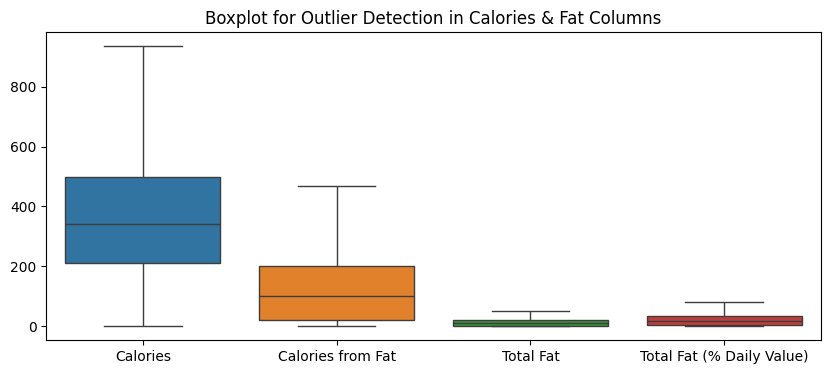

In [ ]:
plt.figure(figsize=(10,4))


columns = ["Calories", "Calories from Fat", "Total Fat", "Total Fat (% Daily Value)"]

sns.boxplot(data=mcd_df[columns])
plt.title("Boxplot for Outlier Detection in Calories & Fat Columns")
plt.show()

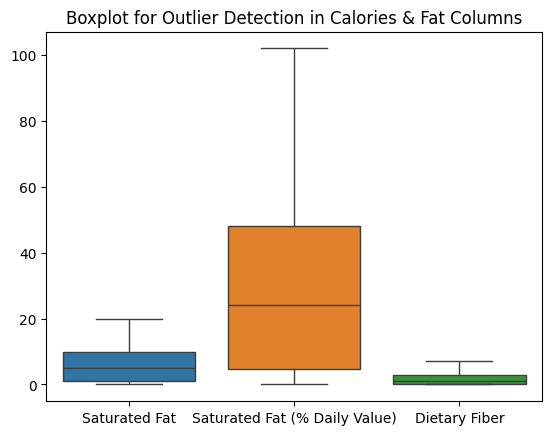

In [ ]:
columns = ["Saturated Fat","Saturated Fat (% Daily Value)","Dietary Fiber"]

sns.boxplot(data=mcd_df[columns])
plt.title("Boxplot for Outlier Detection in Calories & Fat Columns")
plt.show()

-> **For depicting the Variables with the highest correlation. I will be
   selecting the variable-pair which has correlation value of atleast 50% and
    high**

**I have selected 50% value, as variables having 50% or Higher correlational value represents a High degree of inter - dependence on each other.**

**select_dtypes(include=['number'])** → Selects only numeric columns from mcd_df, ignoring text columns.

In [ ]:
correlation = mcd_df.select_dtypes(include =['number']).corr()
correlation

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.885118,0.884997,0.884507,0.866692,0.868239,0.550098,0.578697,0.576933,0.667076,...,0.798102,0.798278,0.517547,0.519850,0.307288,0.742506,0.130315,-0.077610,0.482317,0.645105
Calories from Fat,0.885118,1.000000,0.999580,0.999622,0.888134,0.890237,0.452969,0.694306,0.693326,0.827971,...,0.459086,0.459414,0.583738,0.578030,-0.106010,0.765996,0.075665,-0.102087,0.196676,0.773030
Total Fat,0.884997,0.999580,1.000000,0.999655,0.888149,0.890255,0.450471,0.693132,0.692160,0.827356,...,0.458714,0.459042,0.583419,0.577710,-0.106090,0.765466,0.073243,-0.104471,0.199021,0.772221
Total Fat (% Daily Value),0.884507,0.999622,0.999655,1.000000,0.888503,0.890631,0.451193,0.695072,0.694085,0.829192,...,0.458482,0.458806,0.583895,0.578238,-0.106933,0.767039,0.072297,-0.104221,0.197182,0.773155
Saturated Fat,0.866692,0.888134,0.888149,0.888503,1.000000,0.999279,0.620611,0.631210,0.630334,0.584075,...,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.868239,0.890237,0.890255,0.890631,0.999279,1.000000,0.620210,0.633603,0.632712,0.588694,...,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.550098,0.452969,0.450471,0.451193,0.620611,0.620210,1.000000,0.253935,0.251502,0.187580,...,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.578697,0.694306,0.693132,0.695072,0.631210,0.633603,0.253935,1.000000,0.999855,0.624362,...,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.576933,0.693326,0.692160,0.694085,0.630334,0.632712,0.251502,0.999855,1.000000,0.623320,...,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167
Sodium,0.667076,0.827971,0.827356,0.829192,0.584075,0.588694,0.187580,0.624362,0.623320,1.000000,...,0.200796,0.201032,0.694389,0.689995,-0.426536,0.869802,0.083068,-0.030769,-0.024074,0.871593


In **Seaborn's heatmap**,  annot=True  means "annotate the heatmap with values"—it displays the actual correlation values inside the heatmap cells.

<Axes: >

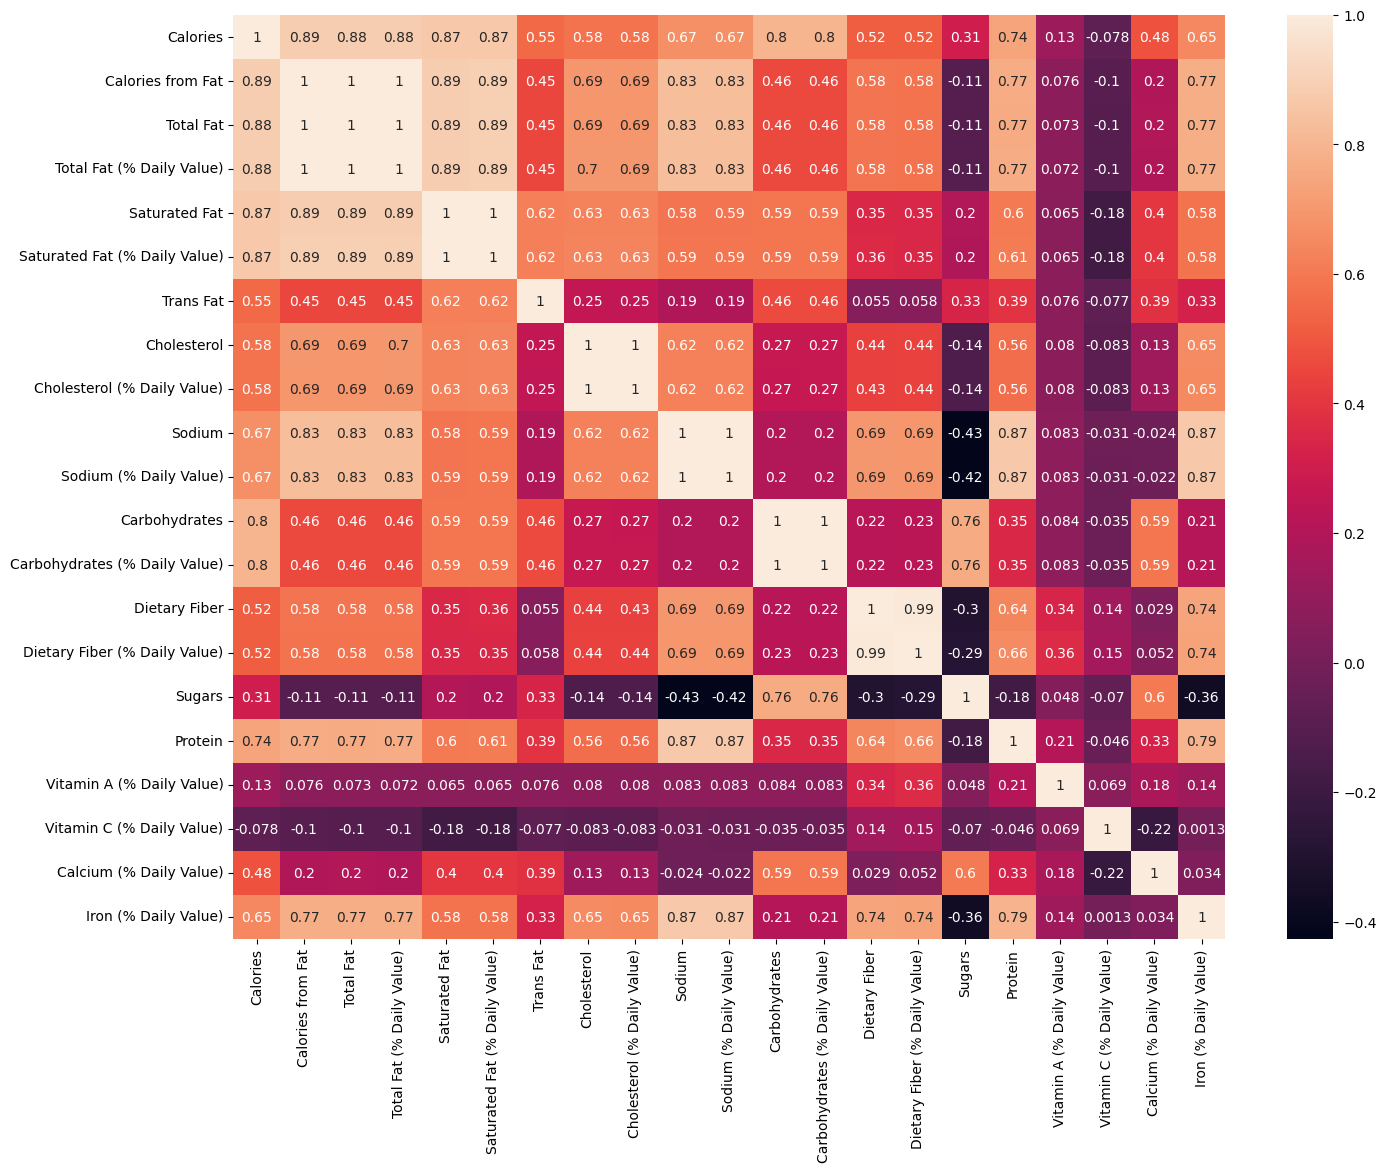

In [ ]:
plt.figure(figsize=(16,12))

sns.heatmap(correlation,annot = True)

**List of Variables which have Correlation with each other**

   Calories with respect to others

    - Calories & Iron [0.64]
    - Calories & Sodium [0.71]
    - Calories & Saturated Fat[0.65]
    - Calories & Saturated Fat [0.85]

   **Calories & Nutritional Factors**
     Calories & Sodium (0.71):

   * High-calorie items often have high sodium, which can impact blood pressure.

   * Awareness: Highlight low-sodium alternatives on the menu.

     **Calories & Saturated Fat (0.85)**

    * High-calorie foods are closely linked to unhealthy fats.

    * Awareness: Recommend grilled options over fried foods

     **Calories & Iron (0.64)**

    * Some high-calorie foods provide essential iron, important for health.

    *  Awareness: Educate customers on iron-rich yet low-calorie meals

   This list is with respect to Total Fat

     - Total Fat & Iron [0.73]
     - Total Fat & Protien [0.81]
     - Total Fat & Dietary Fiber [0.58]
     - Total Fat & Sodium [0.85]
     - Total Fat & Cholestrol [0.68]
     - Total Fat & Saturated Fat [0.85]

    Total Fat & Other Nutrients

     **Total Fat & Protein (0.81):**

     * Foods high in fat also contain protein (e.g., burgers, meats).

     * Awareness: Suggest lean protein alternatives with less fat.

     ** Total Fat & Saturated Fat (0.85):**

     * High-fat items are also high in saturated fat, increasing heart disease
       risk.

     * Awareness: Highlight unsaturated fat sources (e.g., nuts, avocados) in
       menu design.

     ** Total Fat & Iron (0.73):**

     * Some high-fat items contribute to iron intake, beneficial for energy
       levels.

     * Awareness: Help customers choose iron-rich, heart-healthy meals.


   Saturated Fat with respect to others

      -  Saturated Fat & Iron [0.58]
      -  Saturated Fat & Protien [0.6]
      -  Saturated Fat & Carbohydrates [0.58]
      -  Saturated Fat & Sodium [0.58]
      -  Saturated Fat & Cholestrol [0.63]
      -  Total Fat & Trans Fat[0.62]
   
  
  
   Cholestrol with other
      
      - Cholestrol & iron [0.65]
      - Cholestrol & Sodium [0.71]
      - Cholestrol & Protien [0.56]

   **Cholesterol & Sodium (0.71):**

    * Foods high in cholesterol also contain excess sodium.

    *  Awareness: Recommend low-cholesterol, low-sodium meals to   heart-conscious customers.
    
   Carbohydrates
      
       - Carbohydrates & Calicum [0.59]
       - Carbohyderes  & Sugars [0.76]

  **Carbohydrates & Sugar (0.76):**  

      * High-carb foods tend to have added sugars.

      *  Awareness: Suggest natural sugar sources (e.g., fruits instead of processed desserts).


   Dietary Fiber

       - Dietery Fiber & Iron [0.74]

  **Fiber-rich foods help absorb iron, crucial for anemia prevention.**

  **Awareness: Highlight fiber-rich menu options (whole grains, salads).**
      
   Sugers

       - Sugars & Calcium [0.6]

   Protien
    
       - Protien & Iron [0.79]

  

    
    
